# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Hello and Welcome to my brief analysis of a clinic no show rate. Why is this dataset and the analysis of it important? Simply in any business you're running you need to assess the forecasted visit rates to be able to plan staffing accordingly, Which would help cutting down costs of having un utilized staff and when to promote and market your business. 

Data Dictionary *From Dataset Soruce*

01 - PatientId
<li>Identification of a patient</li>
02 - AppointmentID
<li>Identification of each appointment</li>
03 - Gender
<li>Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</li>
04 - DataMarcacaoConsulta
<li>The day of the actuall appointment, when they have to visit the doctor.</li>
05 - DataAgendamento
<li>The day someone called or registered the appointment, this is before appointment of course.</li>
06 - Age
<li>How old is the patient.</li>
07 - Neighbourhood
<li>Where the appointment takes place.</li>
08 - Scholarship
<li>True of False . Observation, this is a broad topic, consider reading this article <li>https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia </li>
09 - Hipertension
<li>True or False</li>
10 - Diabetes
<li>True or False</li>
11 - Alcoholism
<li>True or False</li>
12 - Handcap<
<li>True or False</li>
13 - SMS_received
<li>1 or more messages sent to the patient.</li>
14 - No-show
<li>True or False.</li>

### Question(s) for Analysis
Today we gonna drill down through the dataset to invastigate what makes people no show.
<li>1 - is it specific day?</li>
<li>2 - is it the duration between how far you've booked in advance?</li>
<li>3 - is a specific gender more prone to cancelling or no showing?</li>
<li>4 - age groups and who are more prone to cancelling</li>
<li>5 - which locations has a higher show rates?</li>
<li>6 - does specific disease has a higher show rate?</li>

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta,datetime
% matplotlib inline

# function to switch every row in No-show columns to numbers to be able to get a show rate% easily 
# simple function turning people that showed up to 1 and no showers to 0
def show_to_num(row):
    if row['No-show'] == 'No':
        return 1
    if row['No-show'] == 'Yes':
        return 0

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
#!pip install squarify

<a id='wrangling'></a>
## Data Wrangling

In [9]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.shape,df.dtypes

((110527, 14), PatientId         float64
 AppointmentID       int64
 Gender             object
 ScheduledDay       object
 AppointmentDay     object
 Age                 int64
 Neighbourhood      object
 Scholarship         int64
 Hipertension        int64
 Diabetes            int64
 Alcoholism          int64
 Handcap             int64
 SMS_received        int64
 No-show            object
 dtype: object)

Ok, So we went ahead and loaded up the date and checked the amount of samples that we have (110,527) incidents and after checking the data types for the the columns that we have the modifications that we need is going to be for (ScheduledDay,AppointmentDay) to change it to datetime so we can extract weekday to check which days has higher no show rate and to switch No-show in numbers so we can get mean (ETC...).

### Data Cleaning

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Skd_Weekday'] = df['ScheduledDay'].dt.day_name()
df['Apt_Weekday'] = df['AppointmentDay'].dt.day_name()
df['Advance'] = df['AppointmentDay']-df['ScheduledDay']
df['Advance'] = df['Advance'].dt.days
df['show_rate'] = df.apply(lambda x: show_to_num(x), axis = 1)
showed = df.show_rate == True
skipped = df.show_rate == False
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Advance,show_rate
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000


went ahead and added 2 columns (advance(how far in advance they booked),weekday)Looks like we have no null values as well 

<a id='eda'></a>
## Exploratory Data Analysis

### First lets get some Quick insights for the dataset

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Advance,show_rate
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000


In [12]:
df.groupby('Gender').mean()['show_rate']

Gender
F    0.796854
M    0.800321
Name: show_rate, dtype: float64

Our Show Rate is = 79.8%
Age with higher chance of showing up = 37.08
surprisingly enough Males have a higher show rate.

### Research Question 1 (is it specific day?)

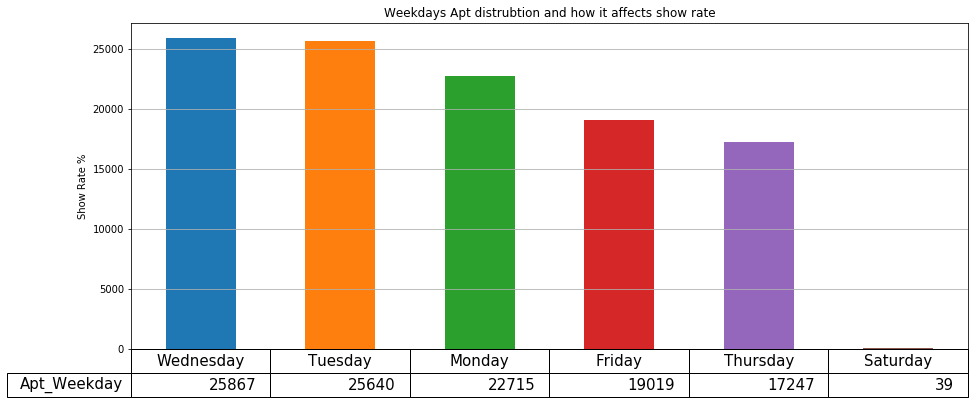

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig = df.Apt_Weekday.value_counts().plot(grid=True, table=True,kind = 'bar', figsize = (15,6))
table = fig.tables[0]
fig.axes.get_xaxis().set_visible(False)
plt.ylabel('Show Rate %')
plt.title('Weekdays Apt distrubtion and how it affects show rate')
plt.xticks([])
table.scale(1,2)
table.set_fontsize(15);

so it does look like Wednseday and Tuesday has the highest booking rate but is it but which is the highest no show?

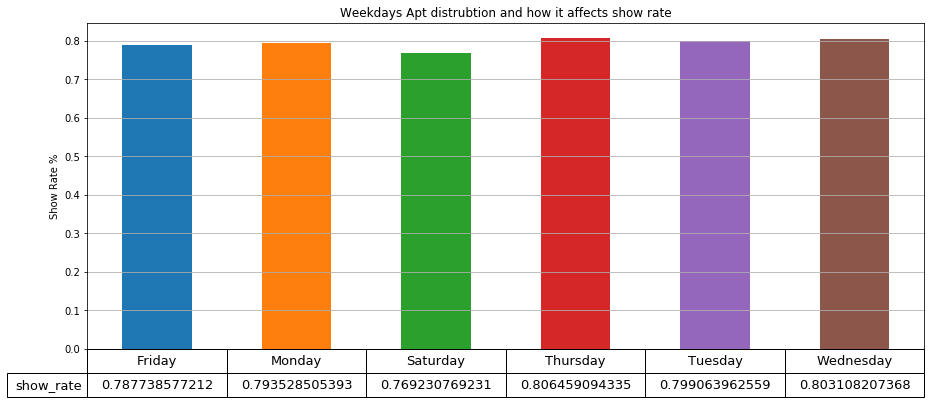

In [21]:
fig = df.groupby('Apt_Weekday').mean()['show_rate'].plot(grid=True, table=True,kind = 'bar', figsize = (15,6))
table = fig.tables[0]
fig.axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.ylabel('Show Rate %')
plt.title('Weekdays Apt distrubtion and how it affects show rate')
table.scale(1,2)
table.set_fontsize(15);

### so it does look even though people are more likely to cancel on tuesday, However i think the relationship is weak since tuesday and Wednesday were the highest booked dates anyway so its only natural that they would have the highest no show rate , it would've been interseting to see if a high booked day would have had a low cancel rate or vise versa

### Research Question 2  (is it the duration between how far you've booked in advance?)

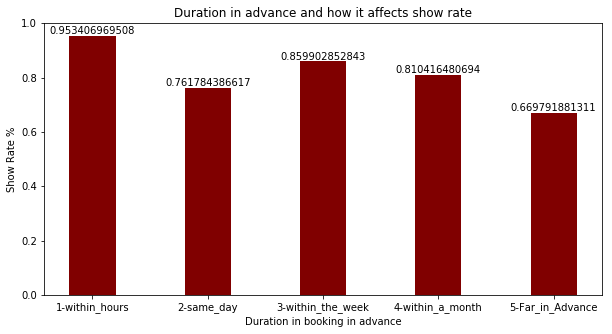

In [15]:
within_hours = df.query('Advance < 0')
same_day = df.query('Advance == 1')
within_the_week = df.query('Advance <= 7')
within_a_month = df.query('Advance <= 30')
Far_in_Advance = df.query('Advance > 30')
x = ['1-within_hours','2-same_day','3-within_the_week','4-within_a_month','5-Far_in_Advance']
y = [within_hours['show_rate'].mean()
     ,same_day['show_rate'].mean()
     ,within_the_week['show_rate'].mean()
     ,within_a_month['show_rate'].mean()
     ,Far_in_Advance['show_rate'].mean()]
fig = plt.figure(figsize = (10,5))
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha = "center", va = "bottom")
plt.bar(x,y,color = 'maroon',width = 0.4)
plt.xlabel('Duration in booking in advance')
plt.ylabel('Show Rate %')
plt.title('Duration in advance and how it affects show rate')
plt.show()

from the plot above it does show that booking too far in advance associate with high no-show rate. and within hours has the highest show rate.

### Research Question 3  ( is a specific gender more prone to cancelling or no showing?)

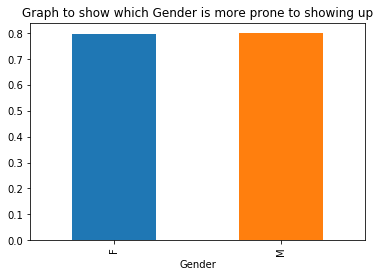

In [16]:
df.groupby('Gender').mean()['show_rate'].plot(kind = 'bar',title = 'Graph to show which Gender is more prone to showing up');

### Research Question 4  ( age groups and who are more prone to cancelling?)

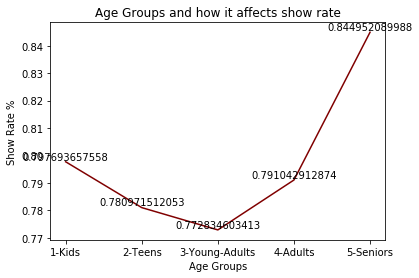

In [17]:
kids = df.query('Age < 12')
teens = df.query('Age < 18')
young_adults = df.query('Age < 25')
adults = df.query('Age < 65')
seniors = df.query('Age >= 65')
x = ['1-Kids','2-Teens','3-Young-Adults', '4-Adults','5-Seniors']
y= [kids['show_rate'].mean(),teens['show_rate'].mean(),young_adults['show_rate'].mean(),adults['show_rate'].mean(),seniors['show_rate'].mean()]

for i in range(len(y)):
    plt.text(i,y[i],y[i], ha = "center", va = "bottom")
plt.plot(x,y, color = 'maroon')
plt.xlabel('Age Groups')
plt.ylabel('Show Rate %')
plt.title('Age Groups and how it affects show rate')
plt.show()

Very interseting to find that we start our life cycle with high show rate and then it drops when we reach the mean and then it starts going up again as we age more.

### Research Question 5  ( which locations has a higher show rates?)

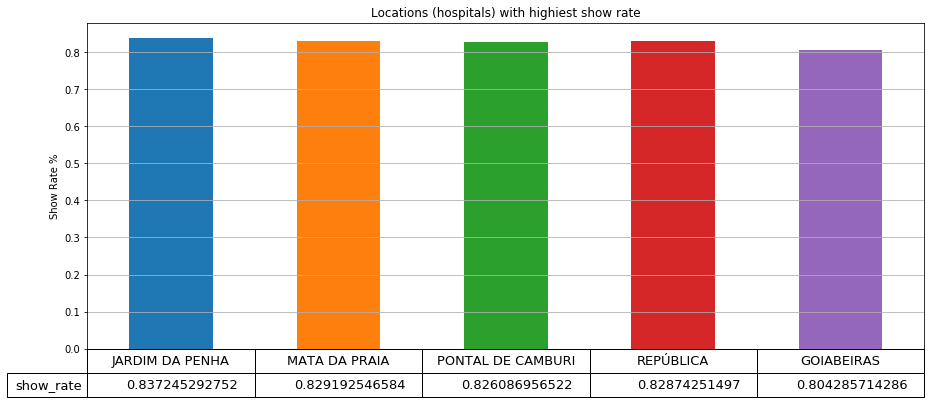

In [29]:
mean = df.groupby('Neighbourhood', sort = False).mean()['show_rate']
fig = mean.head(5).plot(grid=True, table=True,kind = 'bar', figsize = (15,6))
table = fig.tables[0]
fig.axes.get_xaxis().set_visible(False)
plt.ylabel('Show Rate %')
plt.title('Locations (hospitals) with highiest show rate')
plt.xticks([])
table.scale(1,2)
table.set_fontsize(15);

In [27]:
df['Neighbourhood'].nunique()

81

from this graph we can deduce that these five hospitals have the highest show rate among 81 hospital by analaysing those locations we might be able to know why do they have the highest show rate is it the staff the location the size of the hospital and be able to mimic the actions else where to raise the no-show rate of other hospitals

### Research Question 6  ( Does specific disease has a higher show rate?) 

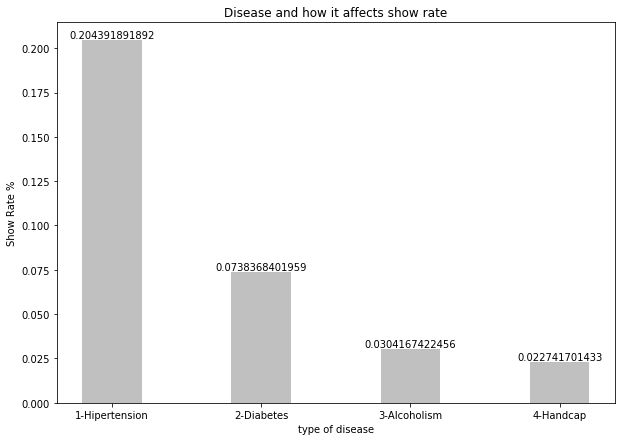

In [19]:
x = ['1-Hipertension','2-Diabetes','3-Alcoholism','4-Handcap']
y = [df.Hipertension[showed].mean(),df.Diabetes[showed].mean(),df.Alcoholism[showed].mean(),df.Handcap[showed].mean()]

plt.figure(figsize=(10,7))
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha = "center",va='bottom')   
plt.bar(x,y,color = 'silver',width = 0.4)
plt.xlabel('type of disease')
plt.ylabel('Show Rate %')
plt.title('Disease and how it affects show rate')
plt.show()

<a id='conclusions'></a>
## Conclusions
So after this we can answer our questions and deduct some interesting information.

<li>1 - is it a specific day? </li> We can say that people don't have a specific day that has high no show rate since their show rate % is very close
<li>2 - is it the duration between how far you've booked in advance?</li> in this question we can deduce that It's less likely to be cancelled if booked within hours and within the week the further the time the more likely people to cancel.
<li>3 - is a specific gender more prone to cancelling or no showing?</li> Both show rates are very close, so we can't deduce a very definite relationship
<li>4 - age groups and who are more prone to cancelling</li>  Very interesting to find that we start our life cycle with high show rate and then it drops till we reach the mean and then it starts going up again as we age more.
<li>5 - which locations have a higher show rates?</li></li> we got the highest 5 locations with most show rates.so we can check what are they doing exactly and make the other location replicate that
<li>6 - does specific disease have a higher show rate?</li> i don't think the information from this question were that important, but we can say people with regular checkup like high-blood-pressure or diabetes are more likely to show up.

### Limitations
would have been very interesting to see if the show rate for the hospitals dropped with time, as people are more dependent on the internet for most of their medical information now. And how did the covid situation affected those rates

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0